In [1]:
pip install --user imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.replace({'gender' : {'Male' : 0 , 'Female' : 1 , 'Other' : 2}}, inplace = True)

In [6]:
df.replace({'smoking_status' : {'never smoked' : 0 ,'Unknown' : 1, 'formerly smoked' : 2 , 'smokes' : 3}}, inplace = True)

In [7]:
df.replace({'Residence_type' : {'Urban' : 0 , 'Rural' : 1}}, inplace = True)

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,0,228.69,36.6,2,1
1,51676,1,61.0,0,0,Yes,Self-employed,1,202.21,NaN,0,1
2,31112,0,80.0,0,1,Yes,Private,1,105.92,32.5,0,1
3,60182,1,49.0,0,0,Yes,Private,0,171.23,34.4,3,1
4,1665,1,79.0,1,0,Yes,Self-employed,1,174.12,24.0,0,1


In [9]:
df.drop(columns=['id'],inplace=True)

In [10]:
df.drop(columns=['ever_married','work_type'],inplace=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,228.69,36.6,2,1
1,1,61.0,0,0,1,202.21,NaN,0,1
2,0,80.0,0,1,1,105.92,32.5,0,1
3,1,49.0,0,0,0,171.23,34.4,3,1
4,1,79.0,1,0,1,174.12,24.0,0,1


In [12]:
y1=df['heart_disease']
y2=df['stroke']

In [13]:
y2.shape

(5110,)

In [14]:
from collections import Counter

In [15]:
print(sorted(Counter(df['heart_disease']).items()))

[(0, 4834), (1, 276)]


In [16]:
x=df.drop(columns=['heart_disease','stroke'])

In [17]:
x.shape

(5110, 7)

In [49]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace = True)

In [50]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling,over_sampling

In [52]:
from imblearn.over_sampling import SMOTE
X_resampled1, y_resampled1 = SMOTE().fit_resample(df[['gender','age','hypertension','Residence_type','avg_glucose_level','bmi','smoking_status']], df['stroke'])

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='stroke'>

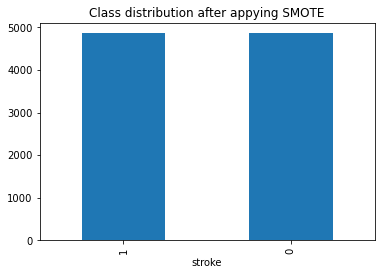

In [53]:
pd.Series(y_resampled1).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='stroke')

In [22]:
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(x,y2)

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resample,y_resample=ros.fit_resample(x,y2)
print(sorted(Counter(y_resample).items()),y_resample.shape)

[(0, 4861), (1, 4861)] (9722,)


In [24]:
x_resample['bmi'].fillna(x_resample['bmi'].mode()[0],inplace = True)

In [25]:
x_resample.isnull().sum()

gender               0
age                  0
hypertension         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [ ]:
df1 = pd.DataFrame(x_resample, columns=['gender','age','hypertension','Residence_type','avg_glucose_level','bmi','smoking_status'])
df1.to_excel('output3.xlsx', index=False)

In [ ]:
df1 = pd.DataFrame(y_resample, columns=['stroke'])
df1.to_excel('output2.xlsx', index=False)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_resample,y_resample,random_state=0, train_size = .70)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='stroke'>

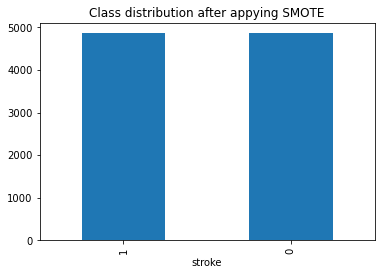

In [67]:
pd.Series(y_resample).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='stroke')

# decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import numpy as np

# Generate a random classification dataset for example
#X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Define the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2}
Best score: 0.8335047759000733


In [32]:
dtree=DecisionTreeClassifier(max_depth=6,min_samples_leaf= 2)

In [33]:
model_dt=dtree.fit(X_train,y_train)

In [34]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

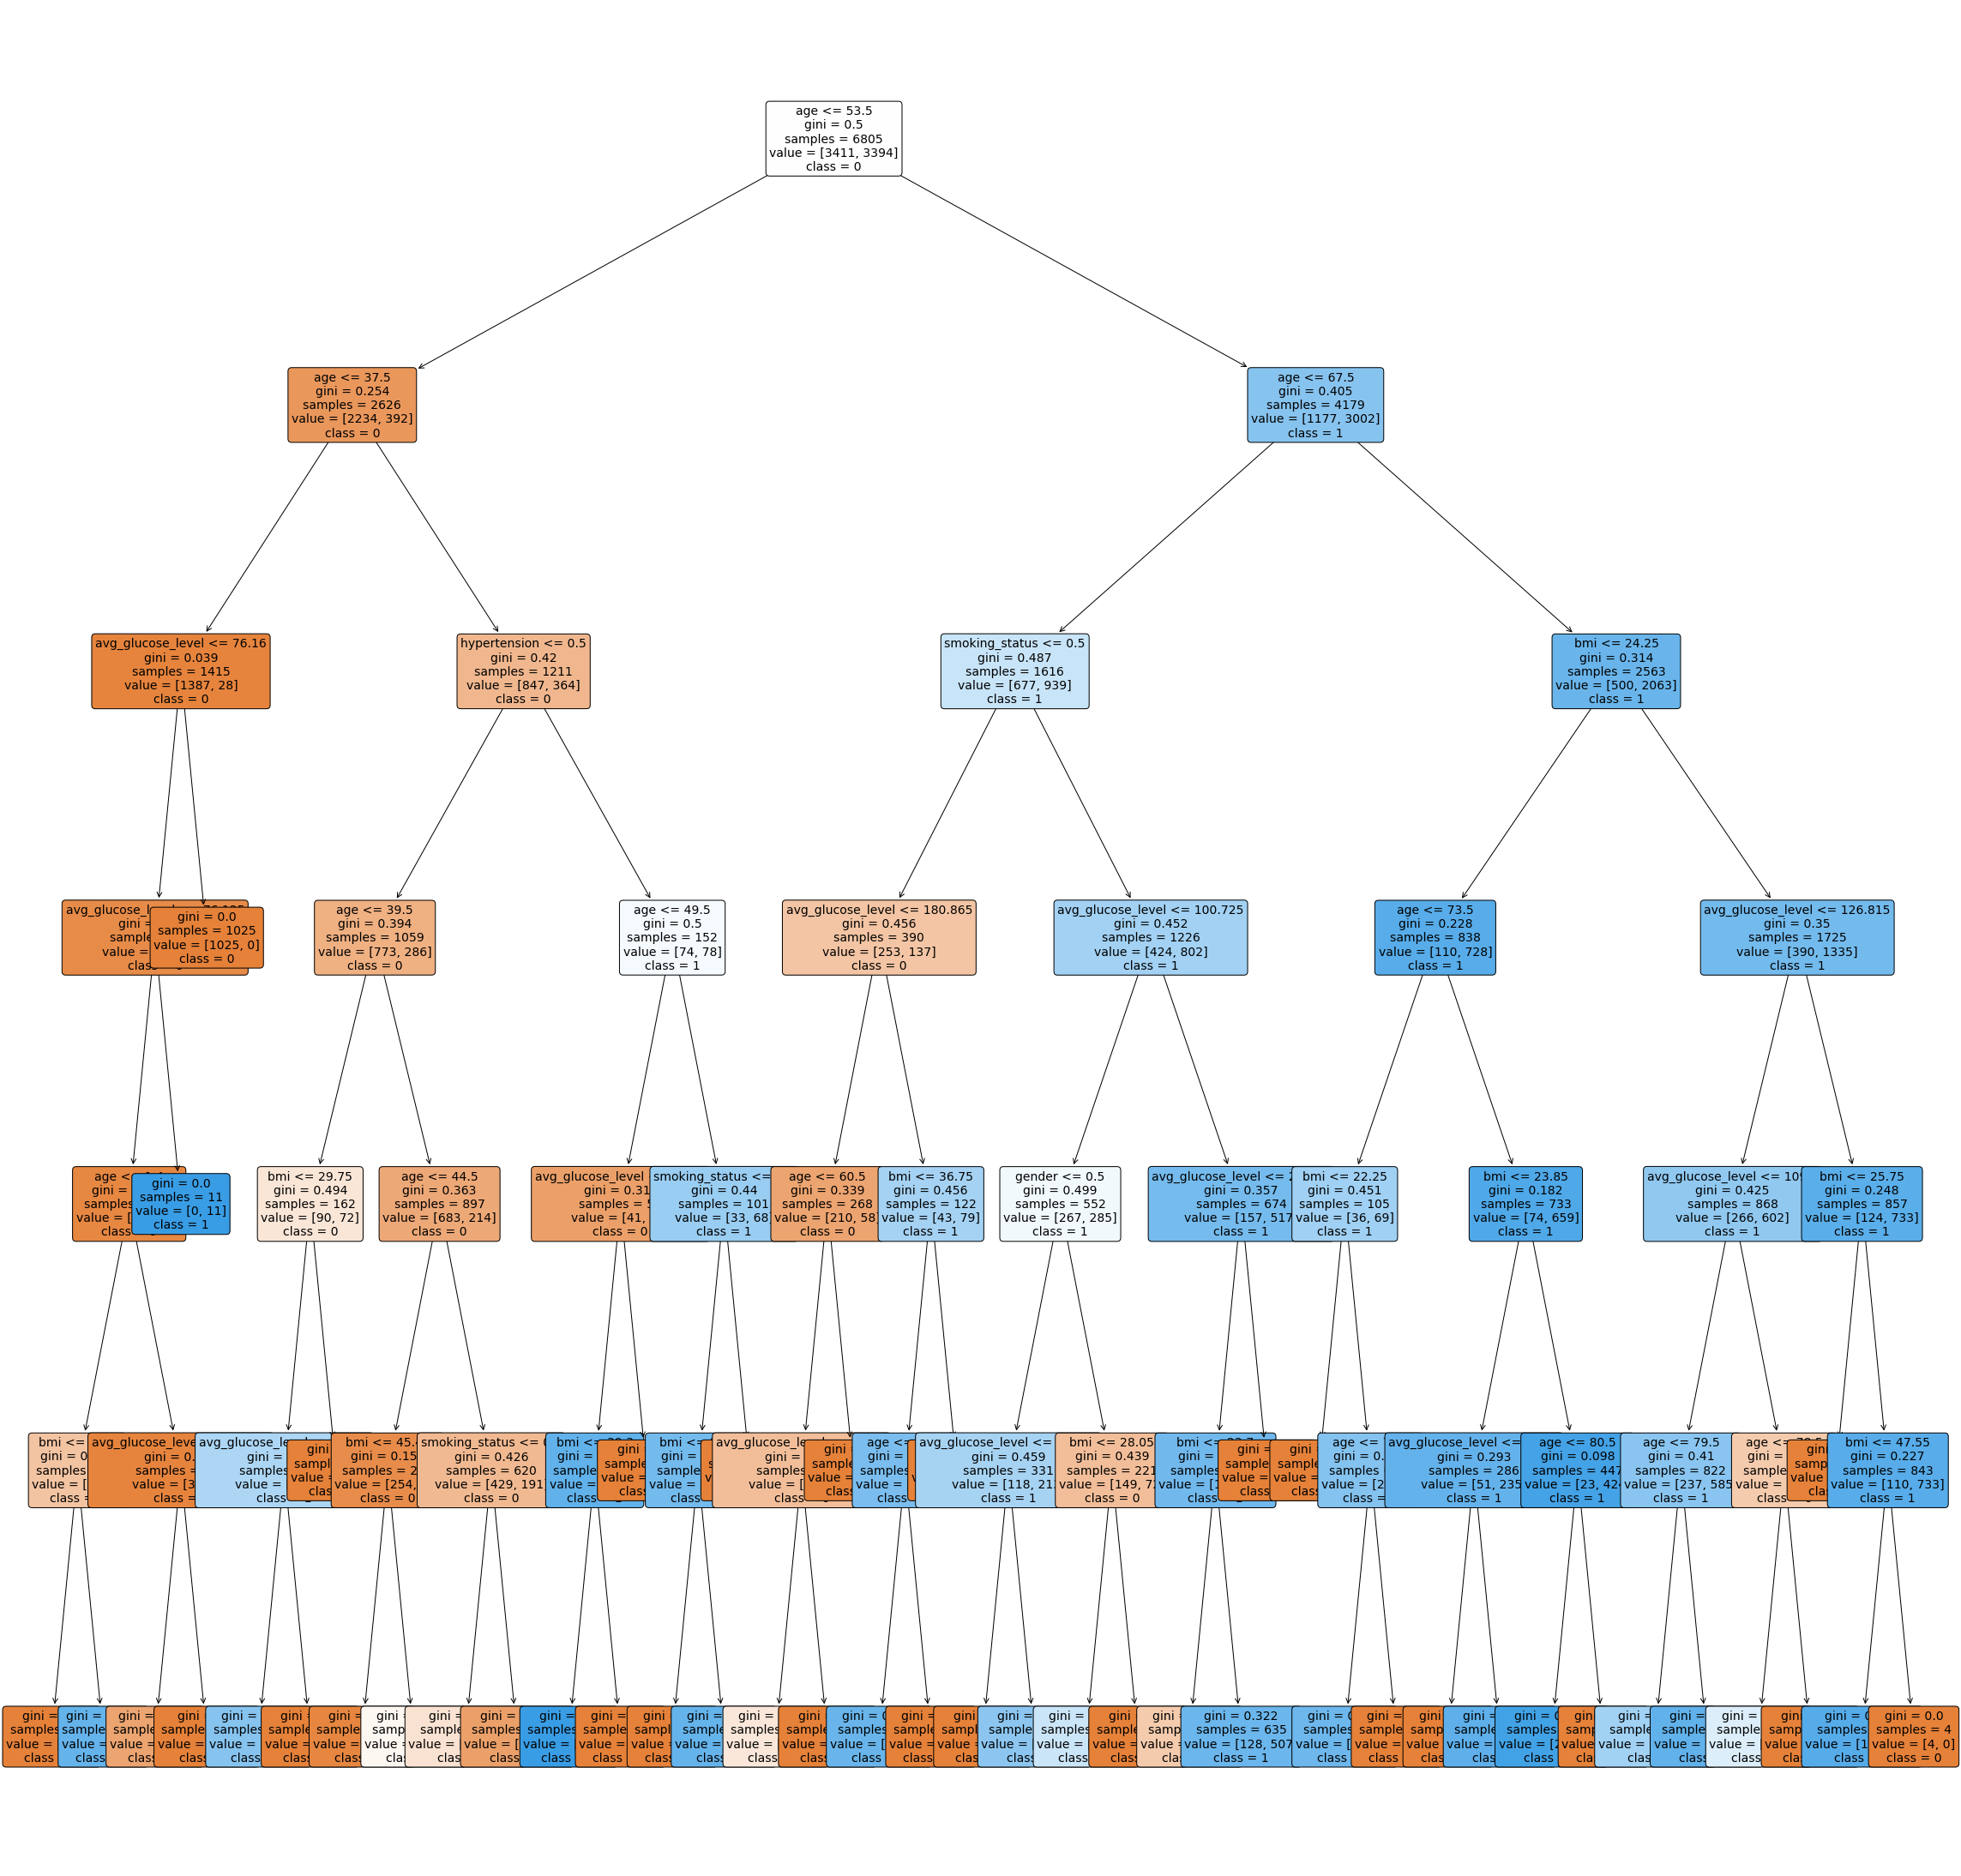

In [35]:

fig=plt.figure(figsize=(40,40))
fn=['gender','age','hypertension','Residence_type','avg_glucose_level','bmi','smoking_status']
a = plot_tree(model_dt,feature_names=fn,class_names=['0','1'],filled=True,rounded=True,fontsize=14)

In [36]:
from sklearn.metrics import accuracy_score
y_dtt = model_dt.predict(X_train)
train_data_accuracy = accuracy_score(y_dtt, y_train)
train_data_accuracy

0.843791329904482

In [37]:
from sklearn.metrics import accuracy_score
y_dt = model_dt.predict(X_test)
test_data_accuracy = accuracy_score(y_dt, y_test)
test_data_accuracy

0.8340761055879328

In [38]:
ex1=X_test.iloc[1]
y1=model_dt.predict(ex1.values.reshape(1,-1))
y1

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# random forest

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6]
}

# Initialize a Random Forest classifier
rfc = RandomForestClassifier()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)

# Fit the model on the oversampled training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier(max_depth=15,min_samples_split=2,n_estimators=200)

model_rf=rf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_rft = model_rf.predict(X_train)
train_data_accuracy = accuracy_score(y_rft, y_train)
print(train_data_accuracy)

from sklearn.metrics import accuracy_score
X_test_prediction = model_rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print(test_data_accuracy)

0.9997060984570169
0.9835447377442578


In [72]:
ex2=X_test.iloc[1]
y2= model_rf.predict(ex2.values.reshape(1,-1))
y2

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Ada boost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import numpy as np

# Generate a random classification dataset for example
#X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Define the AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define the hyperparameters to tune and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best score: 0.8282145481263777


In [75]:
abc = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
model_ab = abc.fit(X_train, y_train)

In [76]:
from sklearn.metrics import accuracy_score
y_abt=model_ab.predict(X_train)
print(accuracy_score(y_train, y_abt))

0.8412931667891257


In [77]:
y_ab = model_ab.predict(X_test)
print(accuracy_score(y_test, y_ab))

0.8395611930065136


In [78]:
ex3=X_test.iloc[1]
y3= model_rf.predict(ex3.values.reshape(1,-1))
y3

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# xgboost

In [79]:
from sklearn import svm
from sklearn import metrics
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [80]:
y_xgt=model_xg.predict(X_train)
print(metrics.accuracy_score(y_train,y_xgt))

0.9972079353416605


In [81]:
y_xg = model_xg.predict(X_test)
print(metrics.accuracy_score(y_test, y_xg))

0.9688035653068221


In [82]:
ex4=X_test.iloc[1]
y4= model_rf.predict(ex4.values.reshape(1,-1))
y4

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# knn

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameters and their values to try
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# Create the KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}


In [86]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
from sklearn.metrics import accuracy_score
y_knnt = model_knn.predict(X_train)
train_data_accuracy = accuracy_score(y_knnt, y_train)
train_data_accuracy

0.9686994856722998

In [88]:
from sklearn.metrics import accuracy_score
y_knn = model_knn.predict(X_test)
test_data_accuracy = accuracy_score(y_knn, y_test)
test_data_accuracy

0.9437778539595475

In [89]:
ex5=X_test.iloc[1]
y4=model_knn.predict(ex4.values.reshape(1,-1))
y4

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [90]:
from sklearn.ensemble import VotingClassifier

In [91]:
model_f1 = VotingClassifier(estimators=[('xg',model_xg), ('adb',model_ab), ('knn', model_knn)], voting='hard')

In [92]:
model_f1.fit(X_train, y_train)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_threshold=64,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0, ...)),
                             ('adb', AdaBoostClassifier(n_estimators=200)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [93]:
yf1 = model_f1.predict(X_test)
yf1_t=model_f1.predict(X_train)
print("Accuracy train:",metrics.accuracy_score(y_train, yf1_t))
print("Accuracy test:",metrics.accuracy_score(y_test,yf1))

Accuracy train: 0.9767817781043351
Accuracy test: 0.947891669523483


In [94]:
exf1=X_test.iloc[1]
yf1=model_f1.predict(exf1.values.reshape(1,-1))
yf1

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [95]:
model_f2 = VotingClassifier(estimators=[('rf',model_rf), ('adb',model_ab), ('knn', model_knn)], voting='hard')

In [96]:
model_f2.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=200)),
                             ('adb', AdaBoostClassifier(n_estimators=200)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [97]:
yf2= model_f2.predict(X_test)
yf2_t=model_f2.predict(X_train)
print("Accuracy train:",metrics.accuracy_score(y_train, yf2_t))
print("Accuracy test:",metrics.accuracy_score(y_test,yf2))

Accuracy train: 0.978104335047759
Accuracy test: 0.9561193006513541


In [98]:
exf2=X_test.iloc[1]
yf2=model_f2.predict(exf2.values.reshape(1,-1))
yf2

C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [99]:
X_test

,gender,age,hypertension,Residence_type,avg_glucose_level,bmi,smoking_status
2913,1,44.0,1,1,105.77,36.8,0
8359,0,80.0,0,1,259.63,31.7,3
7966,0,63.0,0,0,116.69,34.5,2
6381,1,70.0,1,0,89.13,34.2,2
5112,0,74.0,0,0,72.96,31.3,3
...,...,...,...,...,...,...,...
3654,1,32.0,0,0,85.91,22.1,1
5255,0,80.0,1,0,175.29,31.5,2
3315,1,2.0,0,0,105.05,20.4,1
552,0,52.0,0,0,247.69,35.1,1


In [100]:
import pickle
pickle.dump(model_f2,open('stroke.pkl','wb'))

In [101]:
pickle.load(open('stroke.pkl','rb'))

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=200)),
                             ('adb', AdaBoostClassifier(n_estimators=200)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])